In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

In [2]:
data=pd.read_csv(r"C:\Users\Chandra Shekhar\Downloads\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.drop_duplicates()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.shape

(200, 5)

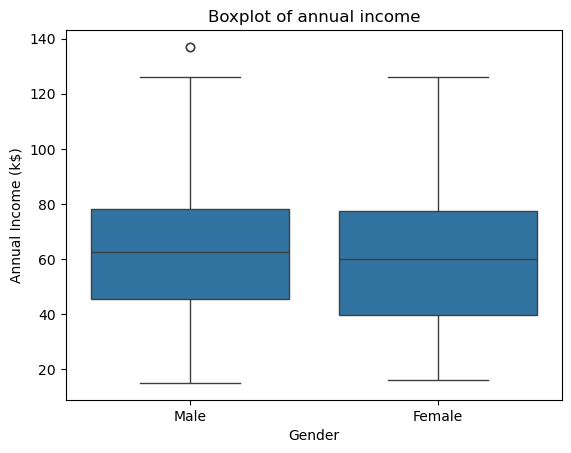

In [13]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Boxplot of annual income')
plt.show()

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

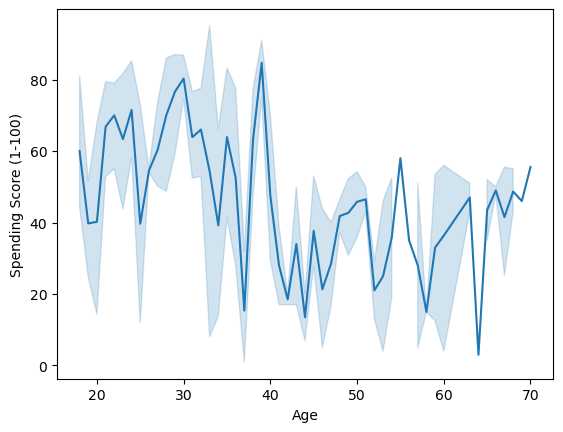

In [6]:
sns.lineplot(data=data,x='Age',y='Spending Score (1-100)')

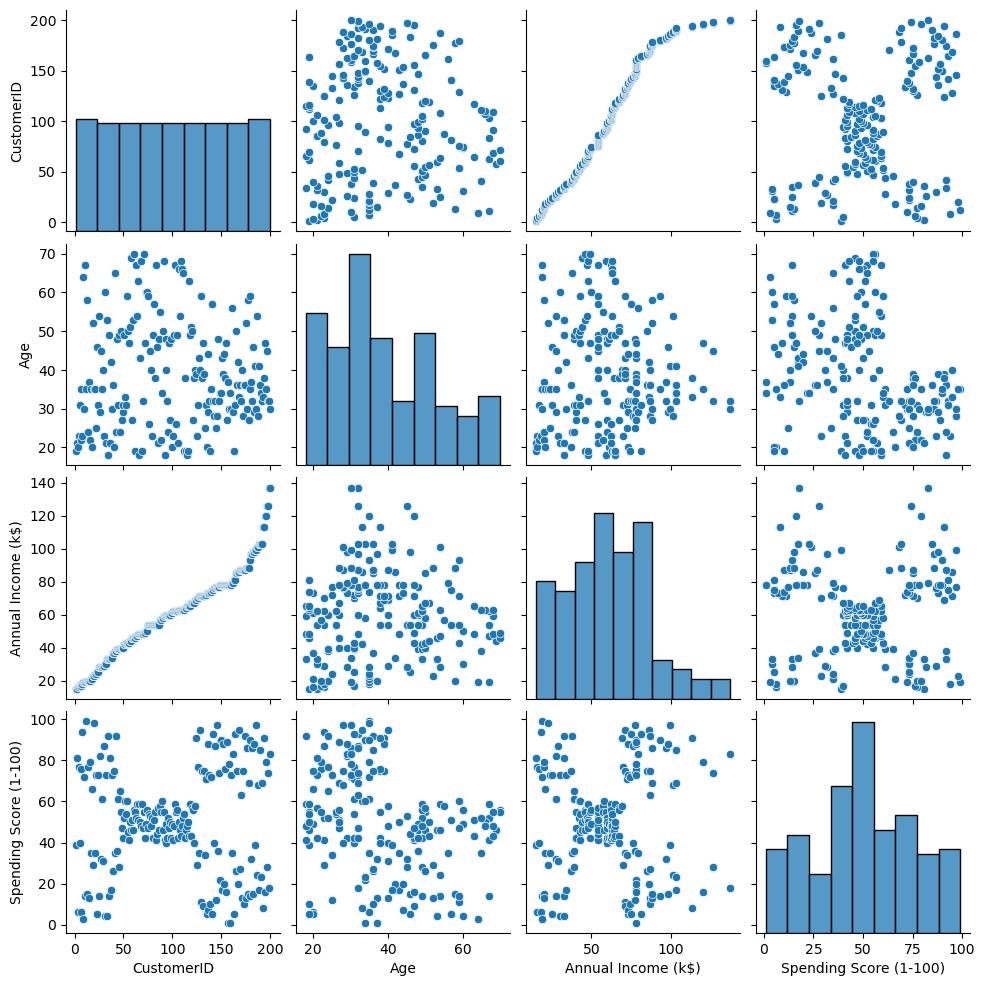

In [14]:
sns.pairplot(data)

In [7]:

#Here we have extracted only 4 and 5 columns as we will use a 2D plot to see the clusters.
X=data.iloc[:,[3,4]].values


In [8]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


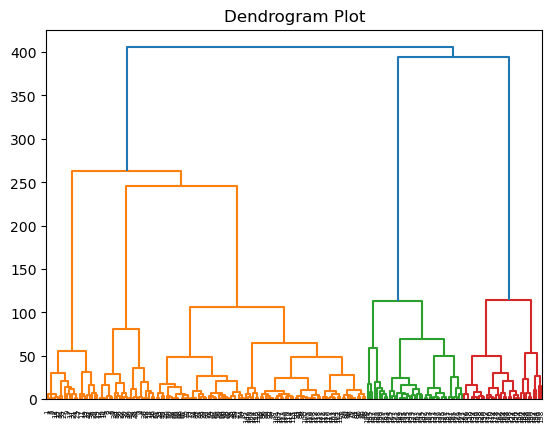

In [9]:
import scipy.cluster.hierarchy as shc

dendrogram=shc.dendrogram(shc.linkage(X,method="ward"))
plt.title("Dendrogram Plot")
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
hc=AgglomerativeClustering(n_clusters=5,linkage='ward',)
pred=hc.fit_predict(X)
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

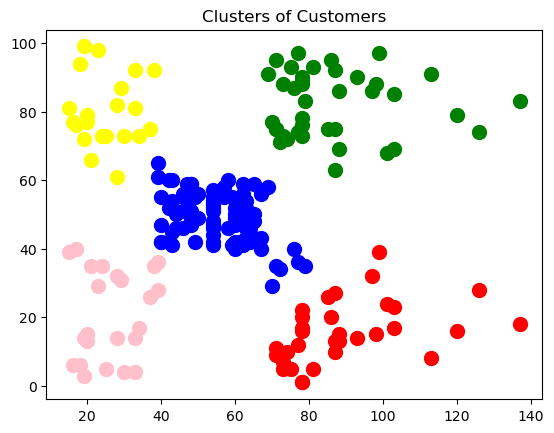

In [12]:
# visualizing the clusters
plt.scatter(X[pred==0,0],X[pred==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[pred==1,0],X[pred==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[pred==2,0],X[pred==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[pred==3,0],X[pred==3,1],s=100,c='yellow',label='Cluster 4')
plt.scatter(X[pred==4,0],X[pred==4,1],s=100,c='pink',label='Cluster 5')
plt.title('Clusters of Customers')
plt.show()